In [4]:
import pickle
import gzip
import numpy as np

In [5]:
# Looking at the logits that are outputted and analyzing them. 

prompt_wanted = 57

prompt_length = 100

vals_dict = {'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ],
'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200]  }


In [16]:
for key, params in vals_dict.items():
    for par in params:
        if par == 200:
            continue
        if par ==None:
            par = "None"
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+par+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        break
    break

In [19]:
rand_selects

array([ 5139,  3768,  3912, 14879,  4848, 13605,  7192,  4237, 11121,
        1026,  8831,  8895,  9386,  8417, 10926, 12170,   689, 11198,
        5558, 14495,  9743,  3571, 10490, 15136, 14165,  5939,  1996,
        5117,  7427,  1754,  8566,  8908,  3902,  7495, 11357,  5927,
       14523,  7528, 11829, 12279, 14369,  3906,  3151,  9904,  9827,
       12211, 12933,  3498,  9235,  6581, 14304, 14487,  5428, 11345,
        7185, 10007,  5472,  4487,   540, 11144,  7012,  4381, 12873,
        7952,  2756, 11068, 15111,  6720, 10393,  3551, 14269, 12066,
        2866, 10860,  7183, 11955, 13936,  7243, 14593,  9269,  3369,
        9500,  2613,  1021,  3822,  7491,  9998,  6938,  1582,  7865,
        2662,  9045,  1324, 11431,  9123, 11092,  2847, 13290,   653,
        1838])

In [14]:
all_logits[0].shape

(25, 50257, 150)

In [22]:
# used to decode:
batch_size = 25
from decodeLogits import *
batch = prompt_wanted//batch_size
ind = prompt_wanted - batch*batch_size

print(batch, ind)

tokens = []
for time_point in range(all_logits[0].shape[2]):
    tokens.append(np.argmax(all_logits[batch][ind, :, time_point]))
decoder_text(tokens)

2 7


" one who can't have a gun. with 's no lot things I can been wanting about, but I'm leave my research that write post later.\n house real concern is that lack of the are to be in. me. I I'm not little lazy thinker.  I I'm a say careful. my. \n\n\xa0\n \n  \n \n \n \n \n \n \n 'm't know if to can be away with this things. the modern place. but I fact that they'm to house full messy stocked with a well don't know. 's like like it risk. me throw into from I house are't as sophisticated as it things trouble house. I should be. "

In [56]:
text[0].shape

(25, 250)

In [ ]:

choose_prompt

In [71]:


import encoder
model_name='345M'
models_dir='../gpt-2/models'
enc = encoder.get_encoder(model_name, models_dir)

prompts=pd.read_csv('test_dataframe_500primer.csv')

enc.encode('!')

[0]

In [76]:
choose_prompt =rand_selects[prompt_wanted]
prompt_target_encoded = enc.encode(prompts.iloc[choose_prompt].test_target)
target = prompt_target_encoded[prompt_length:] # encode and get the prompt length. The rest is the ground truth. 


In [89]:
target[0]

262

In [93]:
np.where(9999999==indices)[0].shape

(0,)

In [88]:
indices

array([  326,   262,   351, ..., 25182, 31727, 34148])

Prompt: 

[WP] A neat freak finds themselves in the midst of a zombie apocalypse. 
 First attempt here. 
 
 Honestly, that was tiring. My house has been messy for years because friends would come over, and have fun. By have fun, I mean destroy the entire place, especially by trying on clothing and throwing them on the floor. My friends apparently are n't as sophisticated as they should be. There needs to be order in the house. And I'm the only

 
Generation: 
 
 one who doesn't have a kitchen stocked. There's a few things I've been thinking about, but I'll do more of a thorough review later. My only real issue is a lot of things seem to happen simultaneously to people... and I'm a very quick observer. So... I have to be careful with things.   
 
 
   
    
 
 
 
 
I don't know how people can get away with these things in the first place, but the fact that I have a house so heavily stocked is... I don't know. It's not worth the hassle to just walk away because my friends aren't as cleve

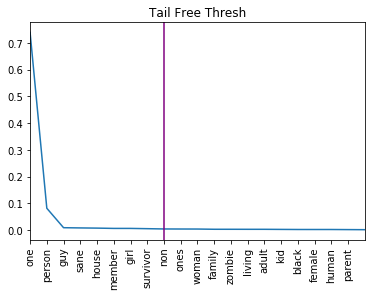

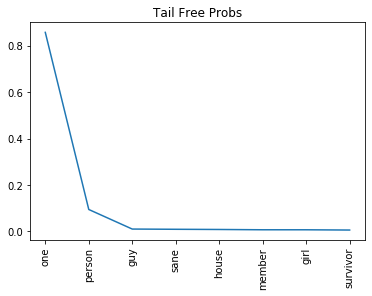

words in order  one person guy sane house member girl survivor
tail value 11
target index 505
location of the 


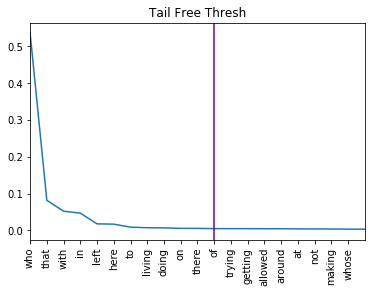

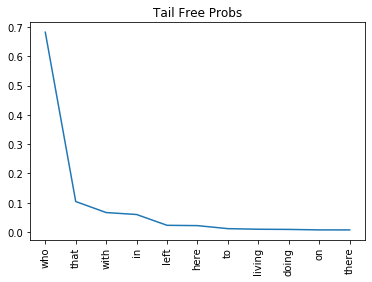

words in order  who that with in left here to living doing on there
tail value 26
target index 1501
location of the 


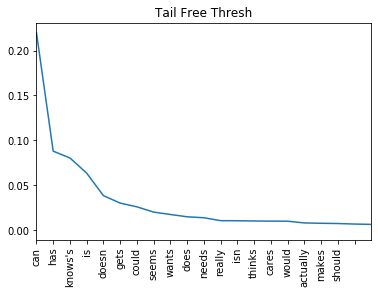

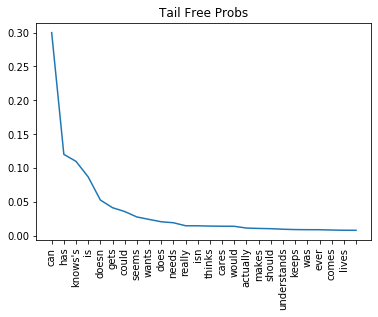

words in order  can has knows's is doesn gets could seems wants does needs really isn thinks cares would actually makes should understands keeps was ever comes lives
tail value 1
target index 41
location of the 


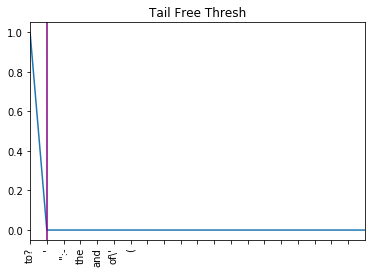

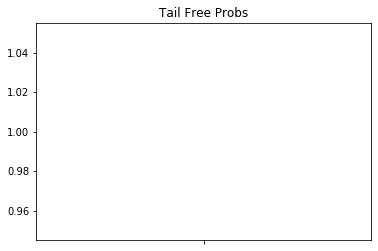

words in order 't
tail value 27
target index 14148
location of the 


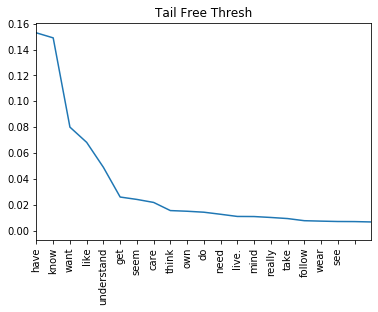

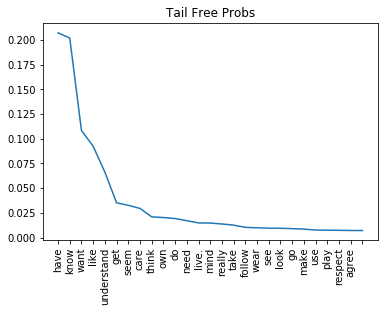

words in order  have know want like understand get seem care think own do need live. mind really take follow wear see look go make use play respect agree
tail value 19
target index 28550
location of the 


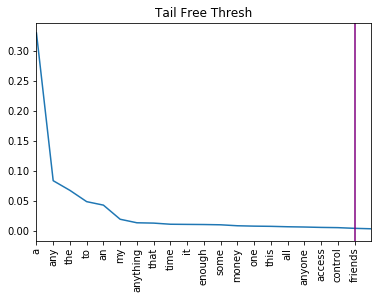

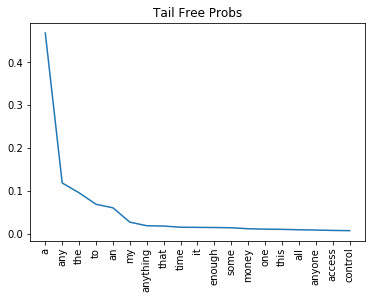

words in order  a any the to an my anything that time it enough some money one this all anyone access control
tail value 23
target index 9035
location of the 


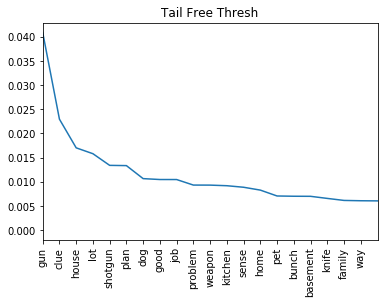

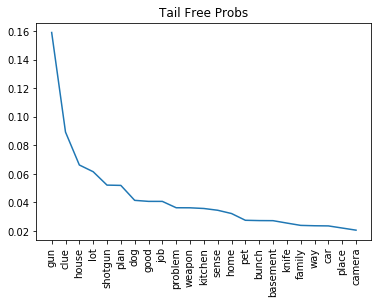

words in order  gun clue house lot shotgun plan dog good job problem weapon kitchen sense home pet bunch basement knife family way car place camera
tail value 26
target index 3332
location of the 


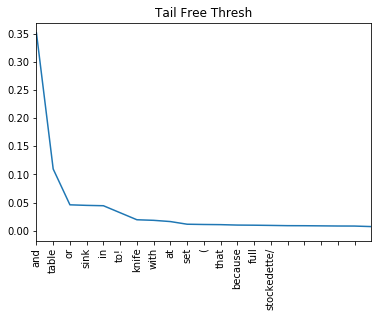

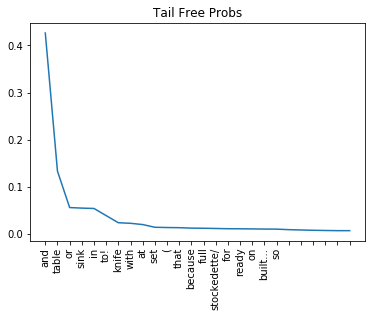

words in order ., and table or sink in to! knife with at set ( that because full stockedette/ for ready on built... so
tail value 8
target index 633
location of the 


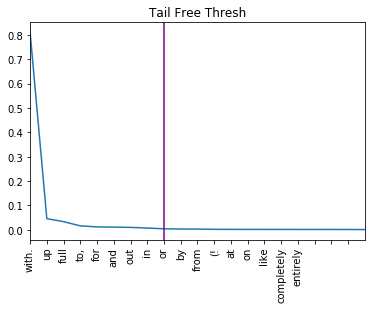

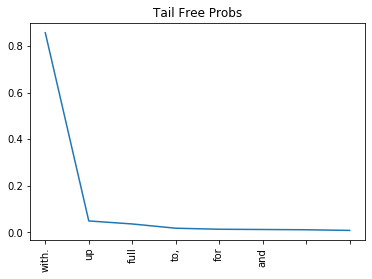

words in order  with. up full to, for and
tail value 21
target index 3912
location of the 


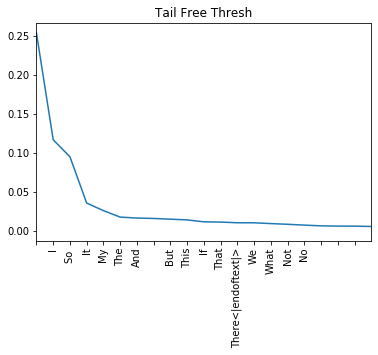

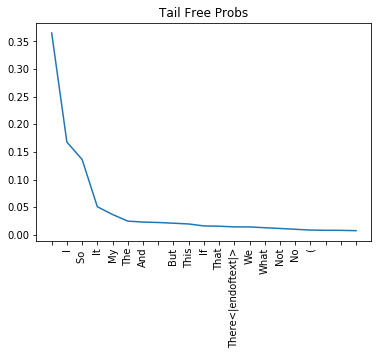

words in order  
 I So  It My The And   But This If That There<|endoftext|> We What Not No (
tail value 15
target index 28
location of the 


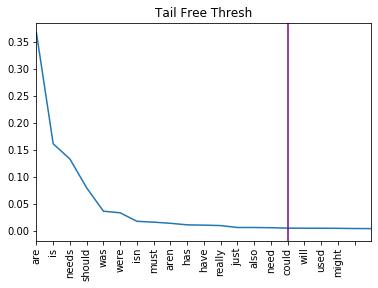

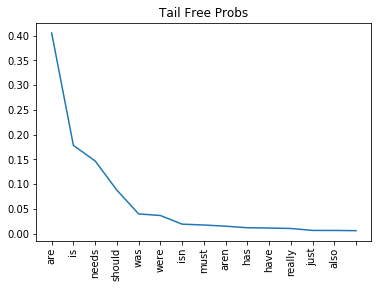

words in order 's are is needs should was were isn must aren has have really just also
tail value 27
target index 103
location of the 


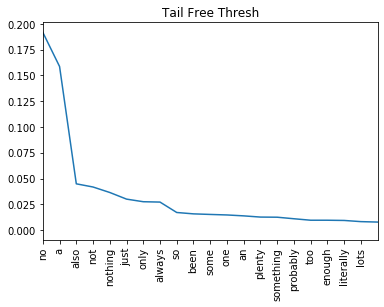

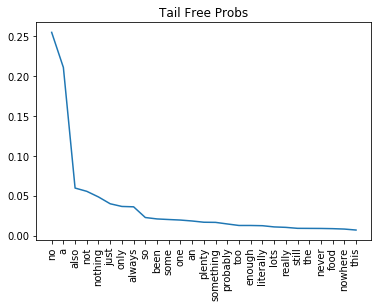

words in order  no a also not nothing just only always so been some one an plenty something probably too enough literally lots really still the never food nowhere this
tail value 25
target index 1613
location of the 


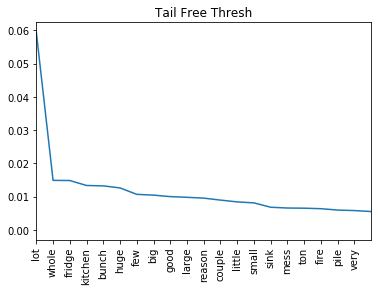

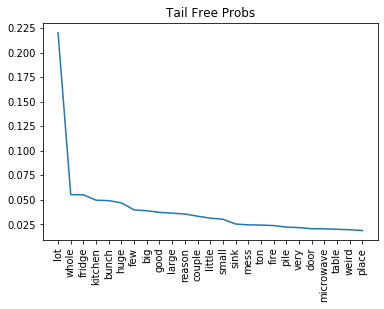

words in order  lot whole fridge kitchen bunch huge few big good large reason couple little small sink mess ton fire pile very door microwave table weird place
tail value 25
target index 340
location of the 


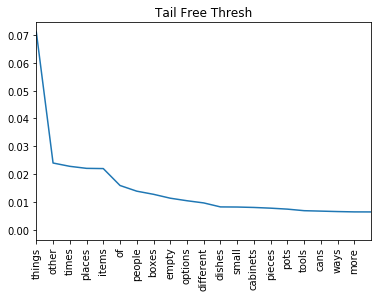

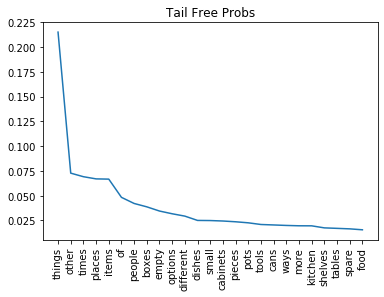

words in order  things other times places items of people boxes empty options different dishes small cabinets pieces pots tools cans ways more kitchen shelves tables spare food
tail value 11
target index 136
location of the 


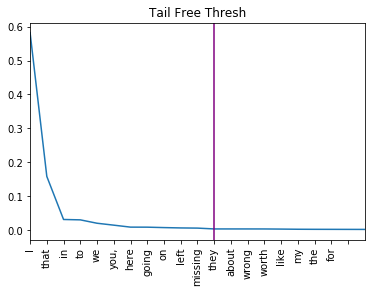

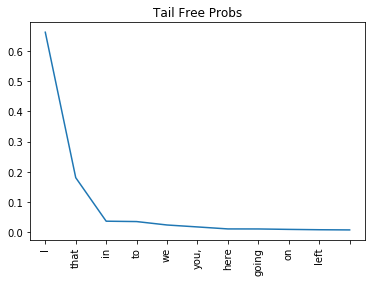

words in order  I that in to we you, here going on left
tail value 21
target index 7840
location of the 


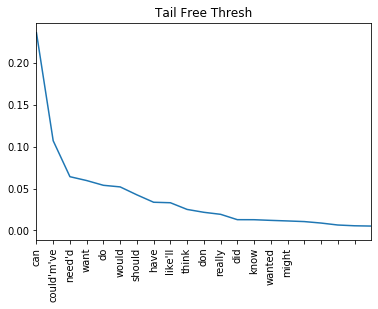

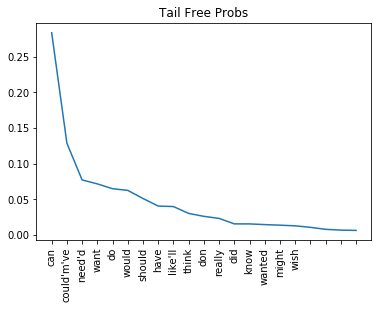

words in order  can could'm've need'd want do would should have like'll think don really did know wanted might wish
tail value 30
target index 2284
location of the 


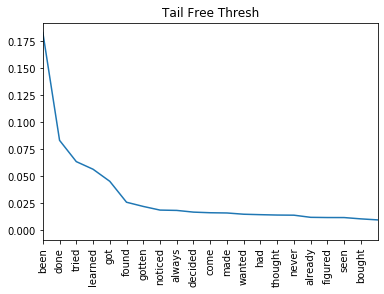

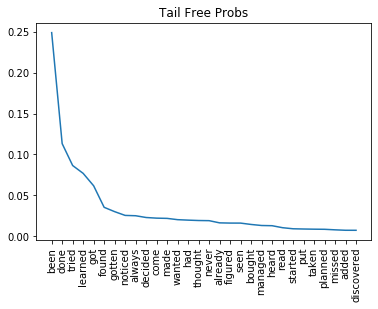

words in order  been done tried learned got found gotten noticed always decided come made wanted had thought never already figured seen bought managed heard read started put taken planned missed added discovered
tail value 22
target index 1764
location of the 


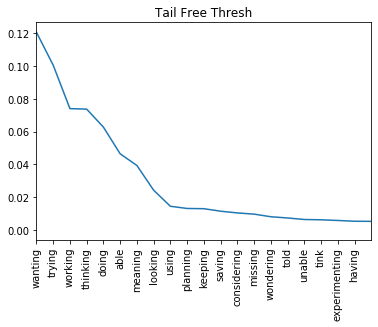

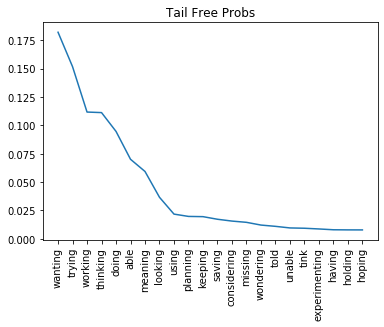

words in order  wanting trying working thinking doing able meaning looking using planning keeping saving considering missing wondering told unable tink experimenting having holding hoping
tail value 6
target index 24
location of the 


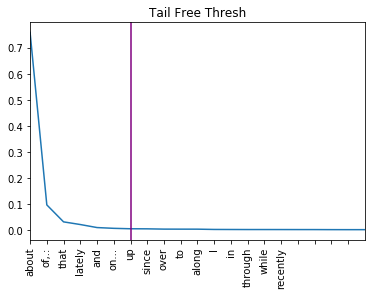

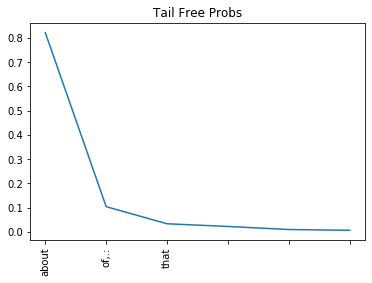

words in order  about of,.: that
tail value 27
target index 1701
location of the 


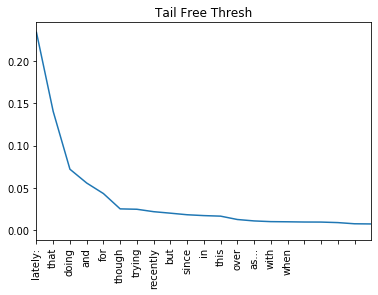

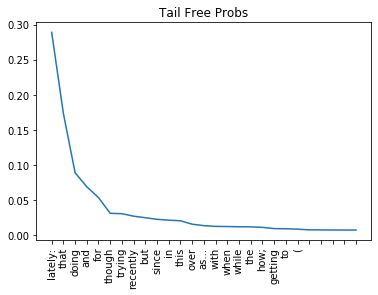

words in order ,. lately: that doing and for though trying recently but since in this over as... with when while the how; getting to (
tail value 12
target index 3795
location of the 


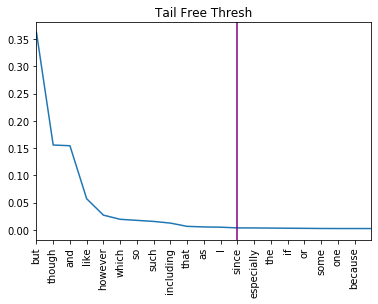

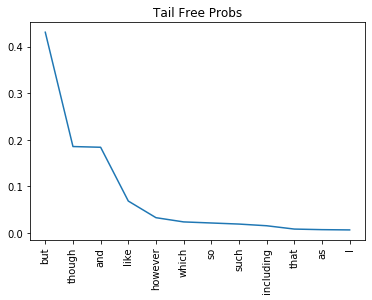

words in order  but though and like however which so such including that as I
tail value 28
target index 269
location of the 


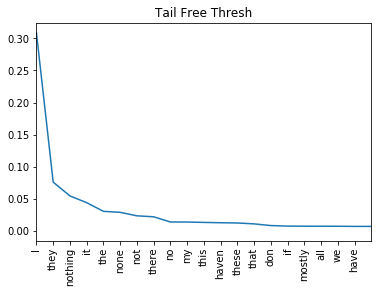

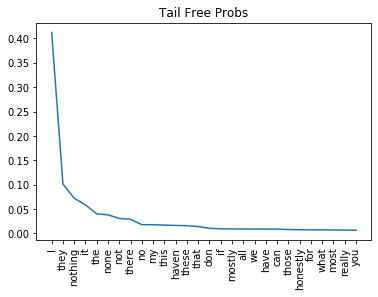

words in order  I they nothing it the none not there no my this haven these that don if mostly all we have can those honestly for what most really you
tail value 19
target index 6191
location of the 


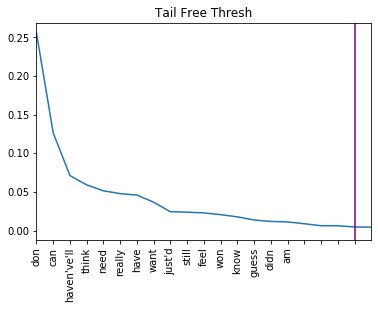

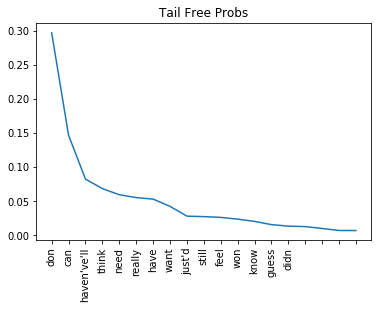

words in order 'm don can haven've'll think need really have want just'd still feel won know guess didn
tail value 32
target index 1389
location of the 


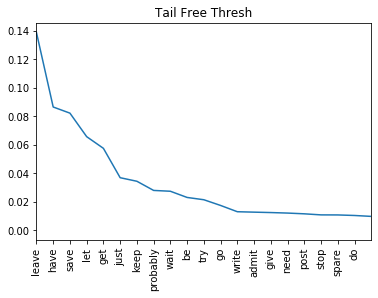

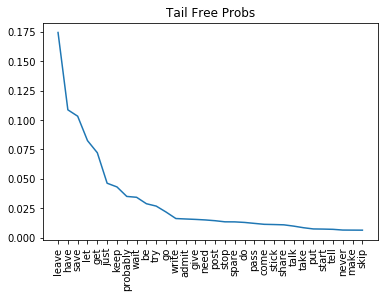

words in order  leave have save let get just keep probably wait be try go write admit give need post stop spare do pass come stick share talk take put start tell never make skip
tail value 18
target index 530
location of the 


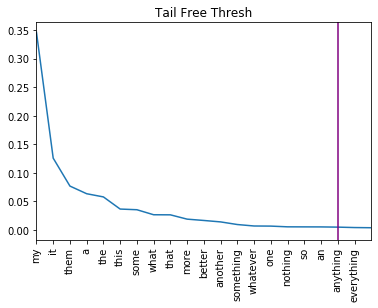

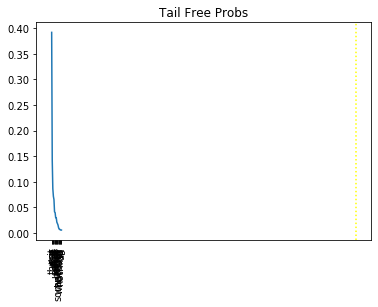

words in order  my it them a the this some what that more better another something whatever one nothing so an
tail value 28
target index 86
location of the 


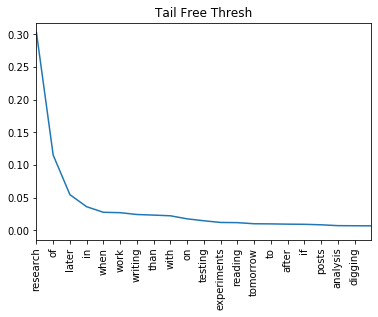

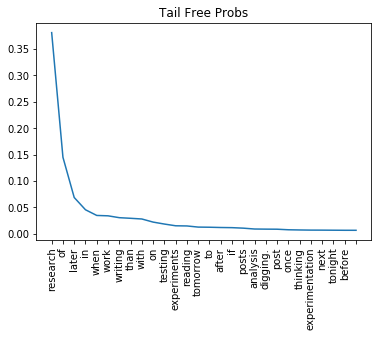

words in order  research of later in when work writing than with on testing experiments reading tomorrow to after if posts analysis digging. post once thinking experimentation next tonight before
tail value 11
target index 107
location of the 


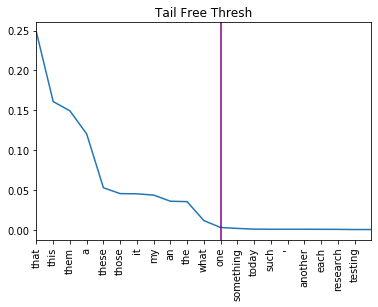

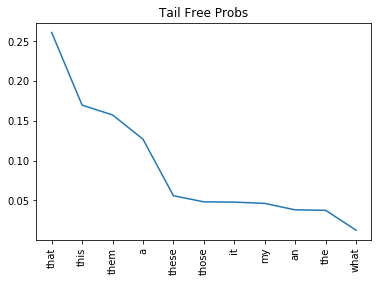

words in order  that this them a these those it my an the what
tail value 23
target index 8170
location of the 


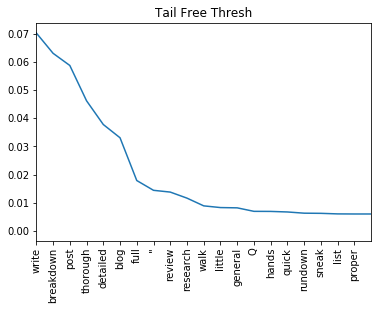

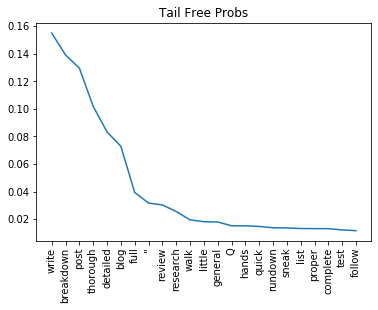

words in order  write breakdown post thorough detailed blog full " review research walk little general Q hands quick rundown sneak list proper complete test follow
tail value 24
target index 24788
location of the 


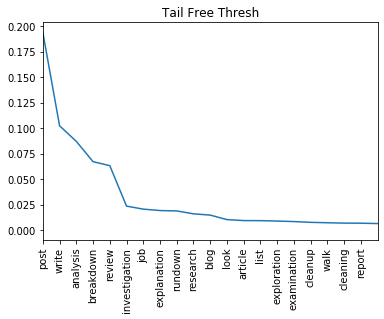

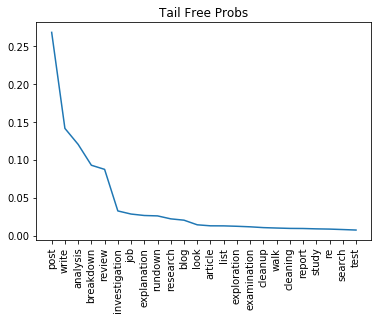

words in order  post write analysis breakdown review investigation job explanation rundown research blog look article list exploration examination cleanup walk cleaning report study re search test
tail value 21
target index 55
location of the 


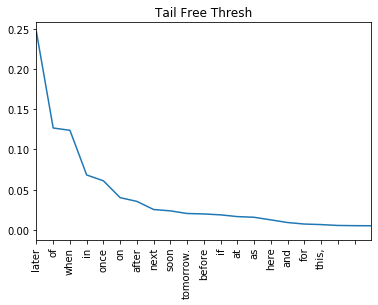

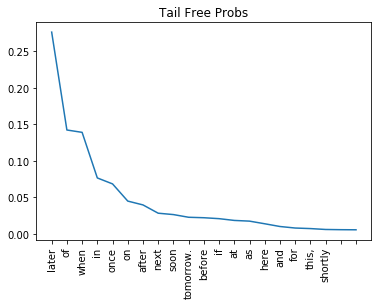

words in order  later of when in once on after next soon tomorrow. before if at as here and for this, shortly
tail value 12
target index 43
location of the 


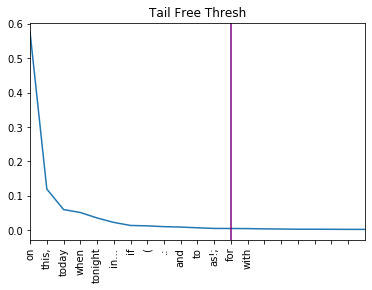

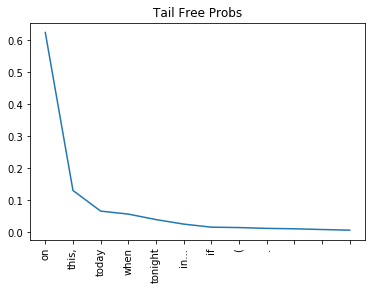

words in order . on this, today when tonight in... if ( .
tail value 26
target index 5205
location of the 


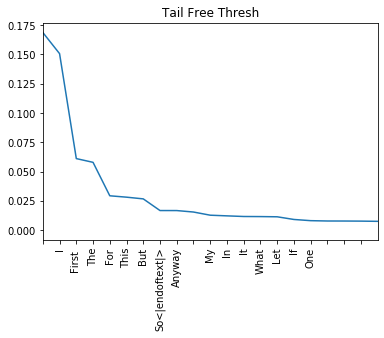

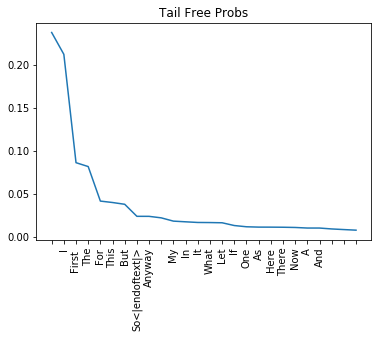

words in order 
  I First  The For This But So<|endoftext|> Anyway   My In It What Let If One As Here There Now A And
tail value 31
target index 15191
location of the 


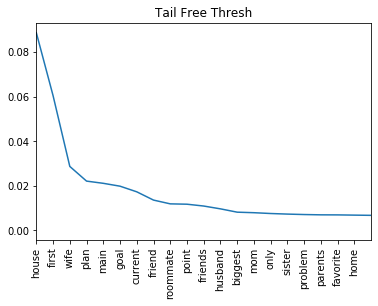

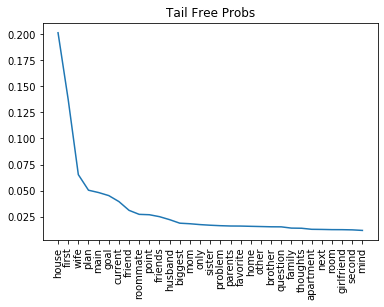

words in order  house first wife plan main goal current friend roommate point friends husband biggest mom only sister problem parents favorite home other brother question family thoughts apartment next room girlfriend second mind
tail value 24
target index 691
location of the 


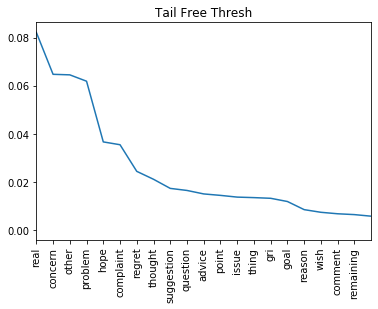

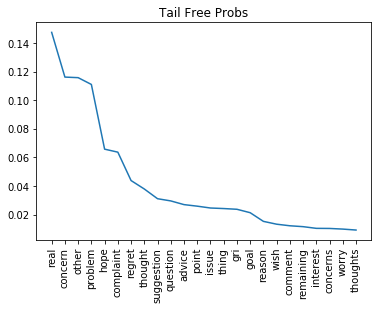

words in order  real concern other problem hope complaint regret thought suggestion question advice point issue thing gri goal reason wish comment remaining interest concerns worry thoughts
tail value 25
target index 2953
location of the 


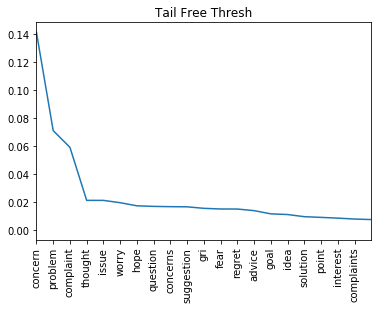

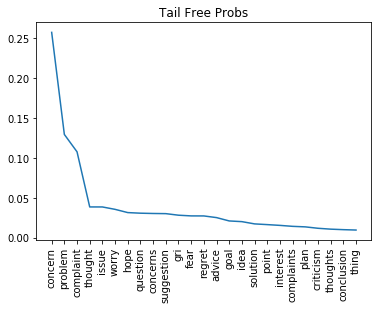

words in order  concern problem complaint thought issue worry hope question concerns suggestion gri fear regret advice goal idea solution point interest complaints plan criticism thoughts conclusion thing
tail value 12
target index 6421
location of the 


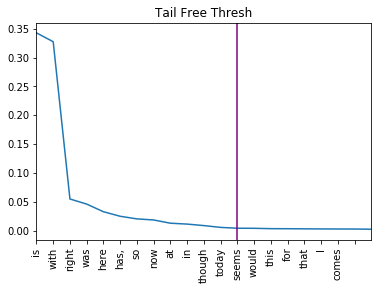

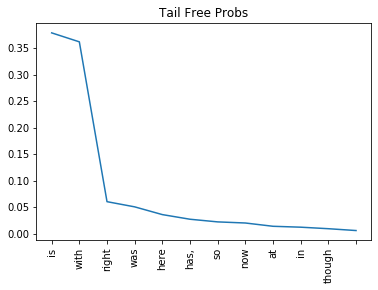

words in order  is with right was here has, so now at in though
tail value 11
target index 6
location of the 


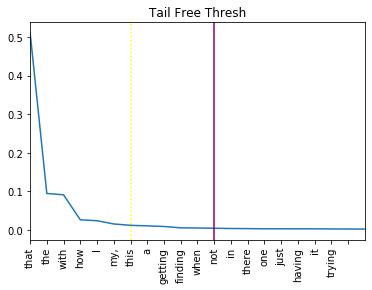

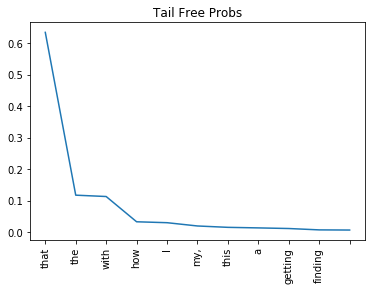

words in order  that the with how I my, this a getting finding
tail value 18
target index 647
location of the 


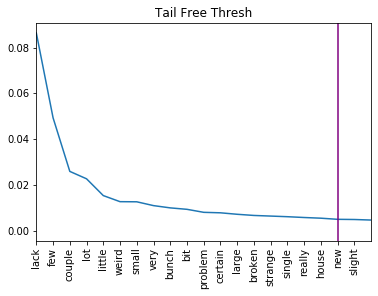

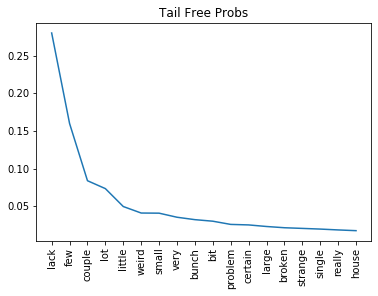

words in order  lack few couple lot little weird small very bunch bit problem certain large broken strange single really house
tail value 1
target index 152
location of the 


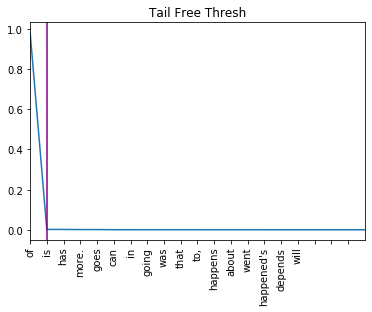

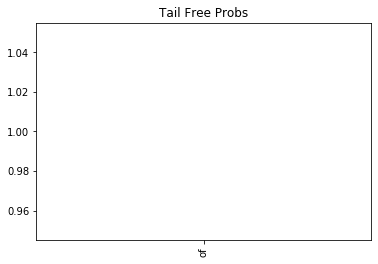

words in order  of
tail value 14
target index 5592
location of the 


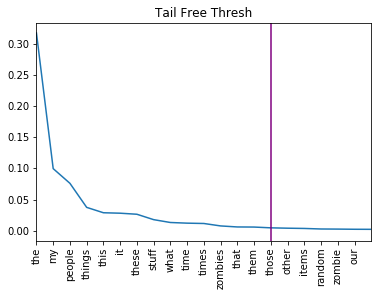

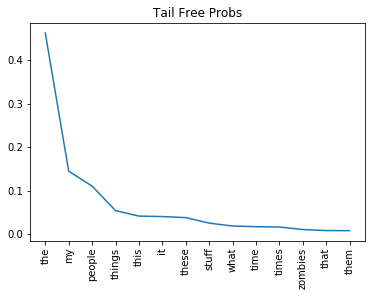

words in order  the my people things this it these stuff what time times zombies that them
tail value 26
target index 58
location of the 


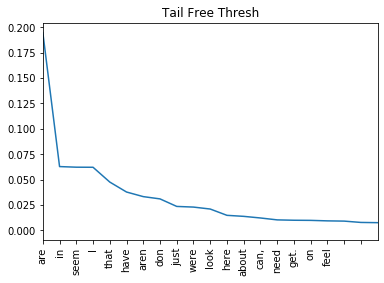

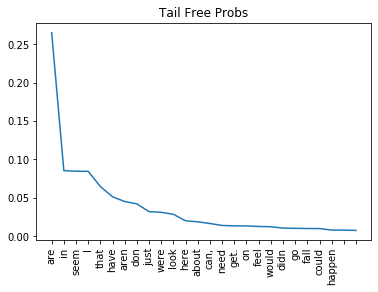

words in order  are in seem I that have aren don just were look here about can, need get. on feel would didn go fall could happen
tail value 15
target index 2570
location of the 


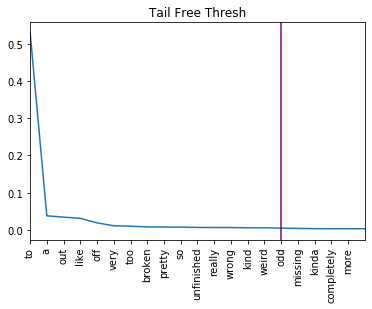

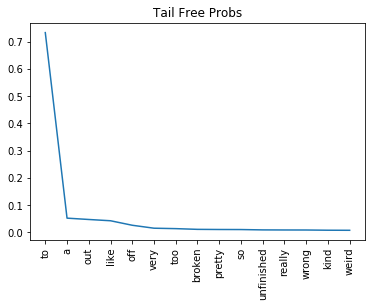

words in order  to a out like off very too broken pretty so unfinished really wrong kind weird
tail value 18
target index 7
location of the 


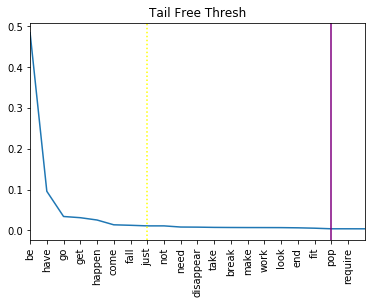

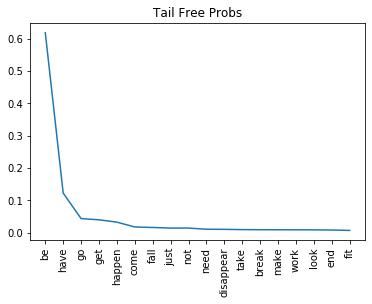

words in order  be have go get happen come fall just not need disappear take break make work look end fit
tail value 39
target index 27
location of the 


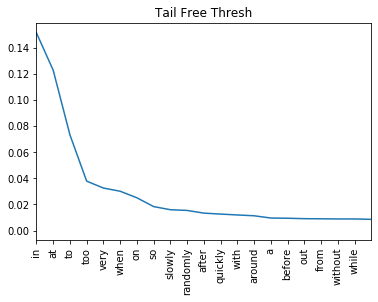

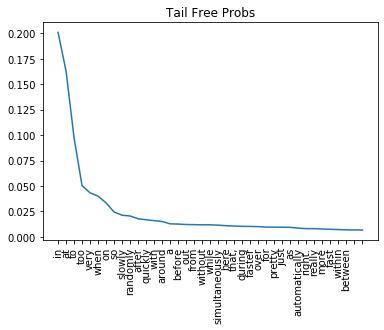

words in order  in at to too very when on so slowly randomly after quickly with around a before out from without while simultaneously here that, during faster over for pretty just as automatically right. really more fast within between
tail value 20
target index 92
location of the 


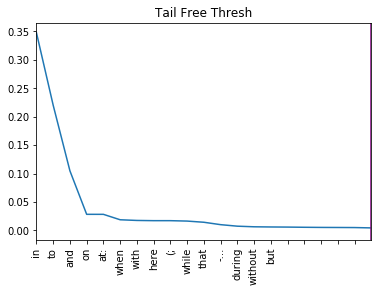

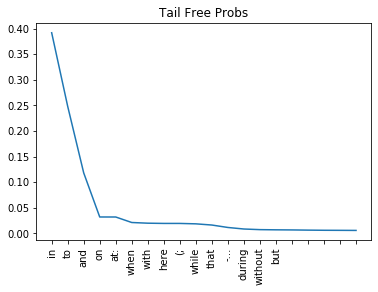

words in order ., in to and on at: when with here (; while that -... during without but
tail value 22
target index 3076
location of the 


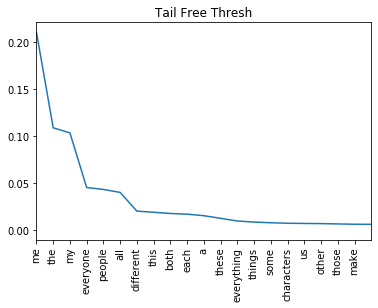

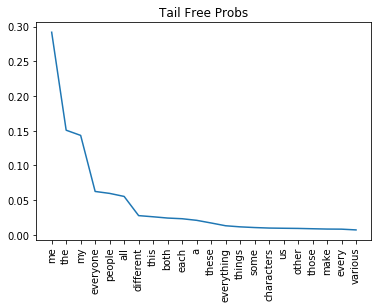

words in order  me the my everyone people all different this both each a these everything things some characters us other those make every various
tail value 23
target index 0
location of the 


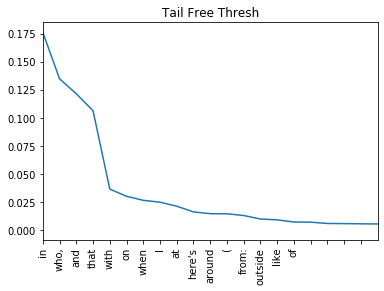

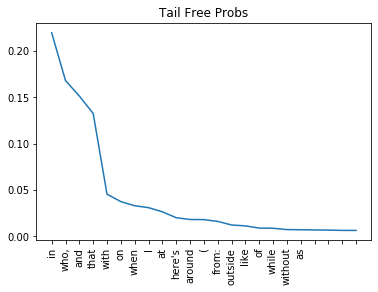

words in order . in who, and that with on when I at here's around ( from: outside like of while without as
tail value 26
target index 37
location of the 


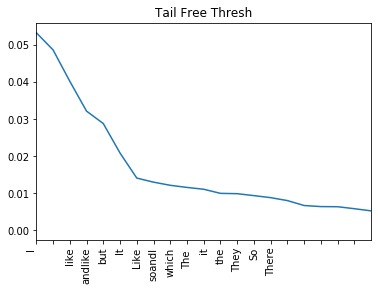

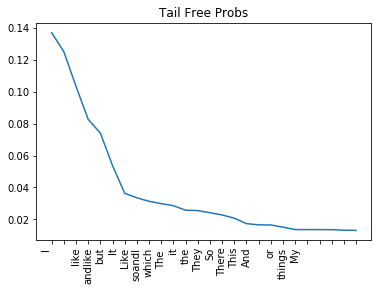

words in order  I
  like andlike but It Like soandI which The  it the They So There This And   or things My
tail value 27
target index 397
location of the 


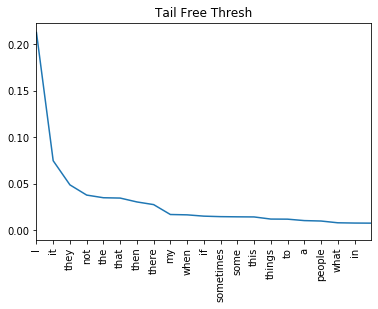

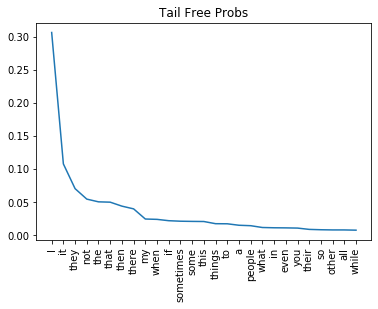

words in order  I it they not the that then there my when if sometimes some this things to a people what in even you their so other all while
tail value 25
target index 74
location of the 


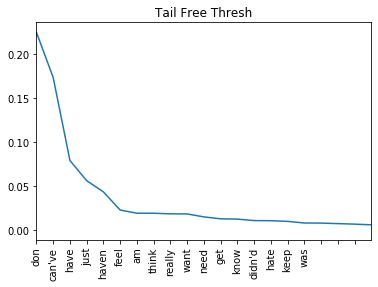

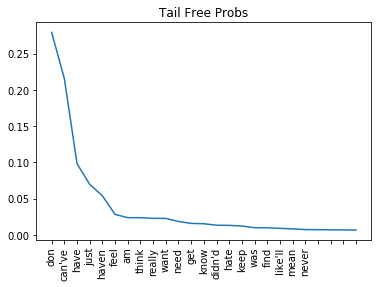

words in order 'm don can've have just haven feel am think really want need get know didn'd hate keep was find like'll mean never


In [96]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

#time_point = 1
plot_window_lim =30

print('Prompt: \n')
print(decoder_text( text[batch][ind, :prompt_length]))
print('\n ====== \n ')
print('Generation: \n ')
gen = text[batch][ind, prompt_length:]
print(decoder_text( text[batch][ind, prompt_length:]))
print('======')

for time_point in range(0,50):

    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))
    indices = np.argsort(-all_logits[batch][ind, :, time_point])
    
    target_plot_index = np.where(target[time_point]==indices)[0][0]

    #finding the tail without any alpha first
    sps_round= np.around(sps,2) # ROUNDING UP THE SPS!
    first = sps_round[1:] - sps_round[:-1]
    second = first[1:] - first[:-1]
    tail_id = second.shape[0]-np.argmax(np.flip(second)>0.001)
    ids_above_tail = indices[:tail_id] # use these indices to determine what the words are and their probabilities. 
    tail_free_probs = softmax(all_logits[batch][ind, ids_above_tail, time_point]) # it is already applying the softmax too

    print('tail value', tail_id)
    print('target index', target_plot_index)

    plt.plot(np.arange(sps.shape[0]),sps)
    plt.xlim([0,plot_window_lim])
    plt.axvline(tail_id, color='purple', linestyle='solid')
    plt.axvline(target_plot_index, color='yellow', linestyle='dotted')
    plt.xticks(np.arange(plot_window_lim), decoder_text(indices[:plot_window_lim]).split(' ')[1:], rotation='vertical')
    plt.title('Tail Free Thresh')
    plt.show()

    plt.plot(np.arange(tail_free_probs.shape[0]), tail_free_probs)
    plt.title('Tail Free Probs')
    if target_plot_index in ids_above_tail:
        plt.axvline(target_plot_index, color='yellow', linestyle='dotted')
    plt.xticks(np.arange(tail_free_probs.shape[0]), decoder_text(ids_above_tail).split(' ')[1:], rotation='vertical')
    plt.show()

    print('words in order',decoder_text(ids_above_tail))

    print('=============')

# Get the prob that the model assigns to the real word. 

# Get Where the different approaches are in rank order. 

In [38]:
decoder_text(ids_above_tail).split(' ')

['', 'one', 'person', 'guy', 'sane', 'house', 'member', 'girl', 'survivor']

In [29]:
ids_above_tail

array([  530,  1048,  3516, 33241,  2156,  2888,  2576, 23446])

In [23]:
decoder_text([0])

'!'

In [ ]:
all_logits[0][ind, :, j]